https://www.kaggle.com/code/nisansher/digit-recognizer-only-linear-algebra-score-82

# 🔢 Solving Kaggle Digit Recognizer Using Only Linear Algebra Score 82% 🚀
<hr style="height:2px; background-color:black; border:none;">

## 📌 Approach  

We use a **linear equation**:  

$$
A\mathbf{x} = \mathbf{y}
$$

Where:  
- $A$ is the model’s matrix.  
- $\mathbf{x}$ is the input image.  
- $\mathbf{y}$ is the output prediction.  

---

### 🔢 Reminder: Matrix Multiplication   

For a matrix $ A $ and vector $ \mathbf{\hat{x}} $:

$$
\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \end{bmatrix} 
\begin{bmatrix} \hat{x}_1 \\ \hat{x}_2 \\ \hat{x}_3 \end{bmatrix} =
\begin{bmatrix} a_{11} \hat{x}_1 + a_{12} \hat{x}_2 + a_{13} \hat{x}_3 \\ 
a_{21} \hat{x}_1 + a_{22} \hat{x}_2 + a_{23} \hat{x}_3 \end{bmatrix}
$$

---

## 🎯 Output $ \mathbf{y} $ (10-Dimensional)  

$y \in \mathbb{R}^{10}$ represents one of **10 digits (0-9)**.  
We **predict** the digit by finding the **index of the largest value** in $ \mathbf{y} $.  

---


## ⌨️ Input Vector $ \mathbf{x} $ (784-Dimensional)  

Each digit image is a **flattened 28×28 pixels grid**: $ 28 \times 28 = 784 $  

---

## 🏗️ Constructing Matrix $ A $  

To map a **784-dimensional vector** to a **10-dimensional output**,  
$A$ must be of size: $ A \in \mathbb{R}^{10 \times 784} $  

Each row of $ A $ interacts with $ \mathbf{x} $,  
ideally producing the **highest value** for the correct digit.  

---

## 🤔 Using Average Digit Rows  

If each row of $ A $ represents the **average image of a digit**,  
multiplication with $ \mathbf{x} $ could highlight the correct digit’s row.  
This isn’t guaranteed but is worth exploring.  

Let's investigate!


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Import the dataset
train = pd.read_csv("train.csv")

# Display dataset shape with explanation
rows, cols = train.shape
print(f"Dataset shape: {rows} rows × {cols} columns\n"
      "The first column is the label, and the rest form a 784-dimensional pixel vector.")

# Show the first row
train.head(1)


Dataset shape: 42000 rows × 785 columns
The first column is the label, and the rest form a 784-dimensional pixel vector.


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***
## The matrix  $𝐴$ will be mean_digit_matrix
the mean of each digit, resulting in 10 rows (one for each digit) and 784 columns.

In [11]:
# Compute mean pixel values per digit
mean_digit_matrix = train.groupby('label').mean()

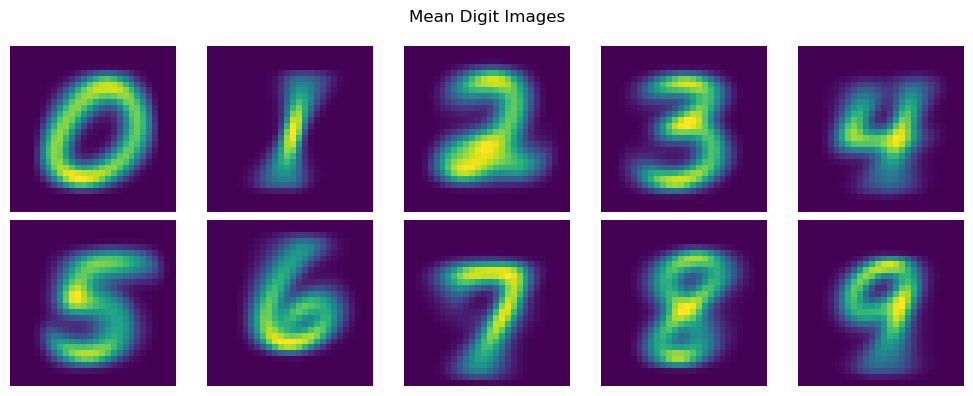

In [12]:
# We will display all the average digits from our matrix A
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i in range(10):
    ax = axes[i // 5, i % 5]  
    ax.imshow(mean_digit_matrix.iloc[i].values.reshape(28, 28))  
    ax.axis("off")

plt.suptitle("Mean Digit Images", fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
# Separate features and labels
X = train.iloc[:, 1:].values  # Convert to NumPy array for compatibility
y = train.iloc[:, 0].values  # Extract label column

$Ax = y$ (10-dimensional vector $ y $) 💡.  
The predicted output, $ y_{\text{pred}} $, is determined by selecting the index of the highest value in $ y $ 🔝.

For a batch of inputs, we represent them as a matrix $ X $ , where each row corresponds to an individual $ x $ .  
The output is then a matrix $ Y $, where each row corresponds to the computed $ y $ for a given input. The final predictions are obtained by selecting the index of the maximum value in each row of $ Y $ ✨.


In [14]:
%%time
y_pred =(mean_digit_matrix @ X.T).idxmax(axis=0)

CPU times: total: 641 ms
Wall time: 320 ms


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix


# Compute accuracy and confusion matrix
def evaluate_model(y_true, y_pred) -> None:
    acc = round(accuracy_score(y_true, y_pred), 3)
    print(f"Accuracy of model: {acc}")

    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion matrix of model:")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy of model: 0.621


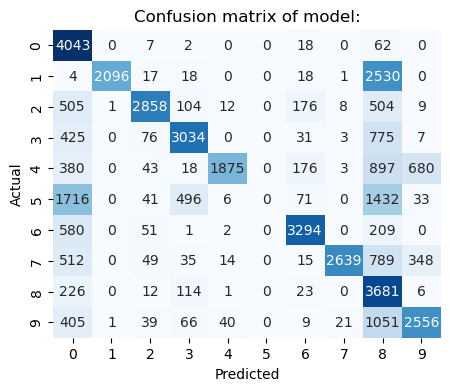

In [16]:
evaluate_model(y, y_pred)

***  
Since some digits have higher pixel values, we tune $y$ ⚙️ before selecting the index of the maximum value 🔝.

In [17]:
%%time
y_pred =(mean_digit_matrix @ X.T).T

CPU times: total: 141 ms
Wall time: 89.7 ms


Accuracy of model: 0.82


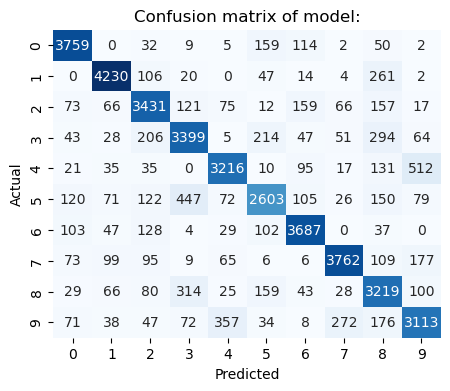

In [18]:

tune = pd.Series([1.15,  0.79,0.98, 1, 0.90, 0.86, 0.99,  0.88, 1.047, 0.94]) 
y_pred=y_pred.div(tune, axis=1).idxmax(axis=1)
evaluate_model(y, y_pred)

***
The tuning ⚙️ gives 82% accuracy 🎯, so we will update our matrix 🔄 to be the final model for us 🏁.


In [19]:
# Divide each column by corresponding value in the divisor Series
mean_digit_matrix = mean_digit_matrix.T.div(tune, axis=1).T

***

In [20]:
X = pd.read_csv("test.csv")

In [21]:
%%time
y_pred =(mean_digit_matrix @ X.T).idxmax(axis=0)

CPU times: total: 422 ms
Wall time: 244 ms


In [22]:
y_pred = pd.DataFrame(y_pred, columns=['Label'])
result = y_pred.assign(ImageId=range(1, len(y_pred) + 1))
result = result[[ 'ImageId','Label']]
result.to_csv("submission.csv",index=False)